# Polynomial Approximation of Sine Function using PyTorch

This notebook demonstrates how to use PyTorch's automatic differentiation (autograd) to fit a third-order polynomial to the sine function over the interval [-π, π]. The implementation:

1. Uses PyTorch tensors to construct a polynomial: y = a + bx + cx² + dx³
2. Minimizes the squared Euclidean distance between the polynomial and sin(x)
3. Employs gradient descent with PyTorch's autograd for optimization
4. Visualizes the results to compare the fitted polynomial with the true sine function

Key concepts demonstrated:
- PyTorch tensor operations
- Automatic differentiation for gradient computation
- Gradient descent optimization
- Model fitting and visualization

Note: A PyTorch tensor with `requires_grad=True` represents a node in the computational graph, enabling automatic gradient computation during the backward pass. These gradients are stored in the tensor's `.grad` attribute.


In [1]:
import torch
import math

# first check if we have GPU access or not. If not, use cpu. 

dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

### Input and Output Tensor Initialization 
Create Tensors to hold input and outputs.
In PyTorch, the default condition `requires_grad=False` for tensors means that these tensors are not part of the gradient computation graph. Therefore, during the backward pass, PyTorch will not compute gradients with respect to these tensors. This is typically used for input and output data, where you do not need to update these values based on the optimization process. 

In the context of the script, `x` and `y` are initialized with `requires_grad=False` because they represent fixed data points (input values and target sine values) that should not be altered during training. Only the weights (`a`, `b`, `c`, and `d`) need to have `requires_grad=True` so that their gradients can be computed and used to update their values during training.

In [2]:
x = torch.linspace(-math.pi, math.pi, 2000, dtype=dtype)
y = torch.sin(x)

### Explanation of Weight Tensor Initialization

In the context of fitting a third-order polynomial using PyTorch, the script initializes random tensors to represent the polynomial's coefficients. The polynomial is expressed as:

$$
y = a + b \cdot x + c \cdot x^2 + d \cdot x^3
$$

#### Key Points:

1. **Weight Initialization**:
   - Four tensors are created: `a`, `b`, `c`, and `d`. These tensors are initialized with random values. Each tensor represents a coefficient in the polynomial equation.
   
2. **Gradient Tracking**:
   - The property `requires_grad=True` is set for each of these tensors. This setting is crucial for optimization, as it tells PyTorch to track operations on these tensors and compute their gradients during the backward pass.
   - Gradients are necessary for updating the weights using gradient descent, which aims to minimize the loss function by adjusting these weights.

By enabling gradient tracking, the script ensures that during the training process, the gradients of the loss with respect to each of these weights are computed. These gradients are then used to update the weights in the direction that reduces the loss, thereby improving the polynomial's fit to the data.

In [3]:
a = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)
c = torch.randn((), dtype=dtype, requires_grad=True)
d = torch.randn((), dtype=dtype, requires_grad=True)

### Detailed Explanation of the Training Loop

This section of the script implements a basic training loop to fit a third-order polynomial to the sine function using gradient descent. Here’s a step-by-step breakdown of the process:

#### 1. **Learning Rate Initialization**
-  `learning_rate = 1e-6`: This small scalar value determines the step size during the weight update process. It controls how much the weights are adjusted with respect to the computed gradients. A smaller learning rate ensures gradual updates, which can lead to more stable convergence.

#### 2. **Training Loop**
-  `for t in range(2000)`: This loop runs for 2,000 iterations, representing the training process over multiple epochs.

#### 3. **Forward Pass**
-  `y_pred = a + b * x + c * x ** 2 + d * x ** 3`: This line computes the predicted values `y_pred` using the current weights (`a`, `b`, `c`, `d`) and the input tensor `x`. This is the forward pass where the model makes predictions based on the current state of the weights.

#### 4. **Loss Calculation**
-  `loss = (y_pred - y).pow(2).sum()`: The loss is computed as the sum of squared differences between the predicted values `y_pred` and the actual values `y`. This is a common loss function for regression tasks, known as the mean squared error (MSE), which measures how well the polynomial fits the sine curve.
-  `if t % 100 == 99: print(t, loss.item())`: Every 100 iterations, the current loss value is printed to monitor the training progress. `loss.item()` extracts the scalar value from the loss tensor for easy reading.

#### 5. **Backward Pass**
-  `loss.backward()`: This call to `backward()` computes the gradient of the loss with respect to all parameters that have `requires_grad=True`. PyTorch's autograd system automatically calculates these gradients and stores them in the `.grad` attribute of each parameter tensor (`a.grad`, `b.grad`, `c.grad`, `d.grad`).

#### 6. **Weights Update**
-  `with torch.no_grad():`: The weight update is performed within a `torch.no_grad()` block to prevent PyTorch from tracking these operations in the computational graph, as they are not part of the gradient computation.
  - `a -= learning_rate * a.grad`: The weight `a` is updated by subtracting the product of the learning rate and its gradient. This step moves `a` in the direction that reduces the loss.
  - Similarly, `b`, `c`, and `d` are updated.

#### 7. **Resetting Gradients**
-  `a.grad = None`, `b.grad = None`, `c.grad = None`, `d.grad = None`: After updating the weights, the gradients are manually reset to `None`. This is important because PyTorch accumulates gradients by default, so clearing them after each update prevents interference from previous iterations.

#### 8. **Result Output**
-  `print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')`: After completing all iterations, the script prints the final polynomial equation with the optimized coefficients. These coefficients represent the best fit for approximating the sine function over the specified interval.

This loop effectively demonstrates the core principles of training a model using gradient descent: forward pass, loss computation, backward pass, and parameter update.

In [4]:
learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')


99 29.55636215209961
199 22.721960067749023
299 18.146961212158203
399 15.082223892211914
499 13.027667045593262
599 11.649290084838867
699 10.723807334899902
799 10.101922988891602
899 9.683694839477539
999 9.402166366577148
1099 9.212502479553223
1199 9.084610939025879
1299 8.998272895812988
1399 8.939937591552734
1499 8.900480270385742
1599 8.873766899108887
1699 8.855661392211914
1799 8.843378067016602
1899 8.835034370422363
1999 8.829360961914062
Result: y = 0.0025428454391658306 + 0.8542773723602295 x + -0.0004386827349662781 x^2 + -0.09297997504472733 x^3


### Testing the estimation!

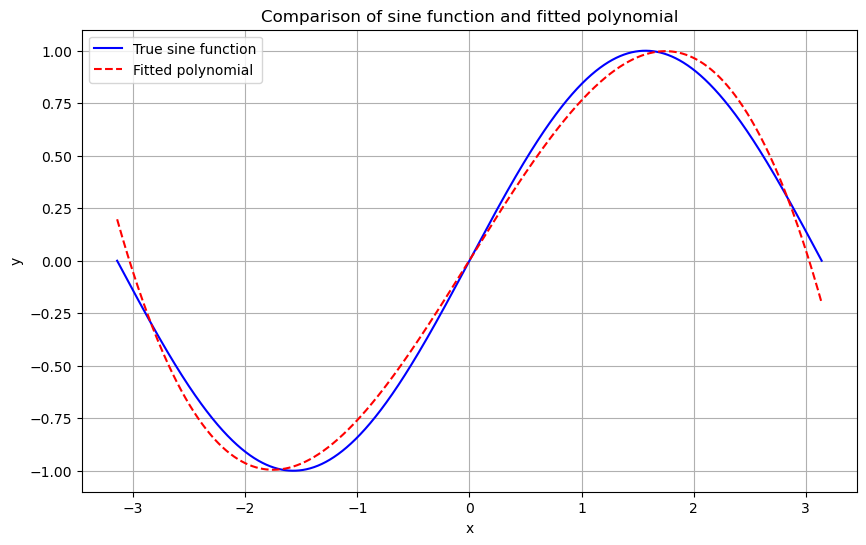

Maximum absolute error: 0.20095816254615784


In [5]:
import matplotlib.pyplot as plt

# Compute the final predicted y values
with torch.no_grad():
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

# Convert tensors to numpy arrays for plotting
x_np = x.cpu().numpy()
y_np = y.cpu().numpy()
y_pred_np = y_pred.cpu().numpy()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_np, y_np, 'b-', label='True sine function')
plt.plot(x_np, y_pred_np, 'r--', label='Fitted polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of sine function and fitted polynomial')
plt.legend()
plt.grid(True)
plt.show()

# Print the maximum absolute error
max_error = torch.max(torch.abs(y_pred - y)).item()
print(f'Maximum absolute error: {max_error}')

In this tutorial, we explore the implementation of a custom autograd function in PyTorch to train a third-order polynomial that predicts \( y = \sin(x) \) over the interval \(-\pi\) to \(\pi\). Instead of expressing the polynomial in the standard form \( y = a + bx + cx^2 + dx^3 \), we utilize a form involving the Legendre polynomial of degree three: \( y = a + b P_3(c + dx) \), where \( P_3(x) = \frac{1}{2}(5x^3 - 3x) \). The focus is on computing the forward pass using PyTorch Tensors and leveraging PyTorch's autograd system to calculate gradients. Additionally, we define a custom autograd function to compute the derivative of the Legendre polynomial, \( P_3'(x) = \frac{3}{2}(5x^2 - 1) \), which plays a crucial role in optimizing the polynomial to minimize the squared Euclidean distance between the predicted and actual values.

In [6]:
import torch
import math

### Custom Autograd Implementation of Third-Order Legendre Polynomial
  1.  Specific mathematical function (Legendre P₃)
	2.	Custom implementation nature
	3.	Automatic differentiation context
	4.	PyTorch framework




In [7]:
class LegendrePolynomial3(torch.autograd.Function):
    """ Inherits from torch.autograd.function. Implements P_3 Legendre polynomial with automatic differentiation. Requires both forward and backward passes"""
    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output.
        """
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)
        """ 
        ctx stores computational context. save_for_backward caches input for gradient calculation. Returns the polynomial evaluation."""

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * input ** 2 - 1)
        """ Applies chain rule: multiplies incoming gradient (grad_output) with local derivative. Returns gradient for backpropagation"""


### Input and Output Tensor Initialization 

In [8]:
dtype = torch.float
device = torch.device("cpu")

In [9]:
xLP = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
yLP = torch.sin(xLP)

1.	Input Space Setup

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
	•	Creates 2000 evenly spaced points from -π to π
	•	Forms the domain for function approximation
	•	device specifies CPU/GPU computation
	•	dtype sets numerical precision
	2.	Target Function

y = torch.sin(x)
	•	Generates true values to be approximated
	•	sin(x) serves as the target function
	•	Creates paired data points (x, sin(x))
	3.	Weight Initialization

$$y = a + b * P3(c + d * x) $$



In [10]:
aLP = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
bLP = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
cLP = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
dLP = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)


Tensors during the backward pass.
	•	Four parameters (a, b, c, d) for the polynomial approximation
	•	Initial values chosen near expected solution for better convergence
	•	requires_grad=True enables gradient computation
	•	Parameters represent:
	▪	a: vertical offset
	▪	b: scaling factor
	▪	c: horizontal shift
	▪	d: horizontal scaling
This setup prepares the optimization problem: find parameters that make a + b * P3(c + d * x) approximate sin(x) well over [-π, π].

In [11]:
learning_rate = 5e-6
for t in range(2000):
    # To apply our Function, we use Function.apply method. We alias this as 'P3'.
    P3 = LegendrePolynomial3.apply

    # Forward pass: compute predicted y using operations; we compute
    # P3 using our custom autograd operation.
    y_predLP = aLP + bLP * P3(cLP + dLP * x)

    # Compute and print loss
    lossLP = (y_predLP - yLP).pow(2).sum()
    if t % 100 == 99:
        print(t, lossLP.item())

    # Use autograd to compute the backward pass.
    lossLP.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        aLP -= learning_rate * aLP.grad
        bLP -= learning_rate * bLP.grad
        cLP -= learning_rate * cLP.grad
        dLP -= learning_rate * dLP.grad

        # Manually zero the gradients after updating weights
        aLP.grad = None
        bLP.grad = None
        cLP.grad = None
        dLP.grad = None

print(f'Result: yLP = {aLP.item()} + {bLP.item()} * P3({cLP.item()} + {dLP.item()} x)')

99 209.95834350585938
199 144.66018676757812
299 100.70249938964844
399 71.03519439697266
499 50.97850799560547
599 37.403133392333984
699 28.206867218017578
799 21.97318458557129
899 17.7457275390625
999 14.877889633178711
1099 12.93176555633545
1199 11.610918045043945
1299 10.71425724029541
1399 10.10548210144043
1499 9.692106246948242
1599 9.411375999450684
1699 9.220745086669922
1799 9.091285705566406
1899 9.003361701965332
1999 8.943641662597656
Result: yLP = -3.398150649758236e-10 + -2.208526849746704 * P3(-2.687075562057828e-10 + 0.2554861009120941 x)


### Testing the Estimation

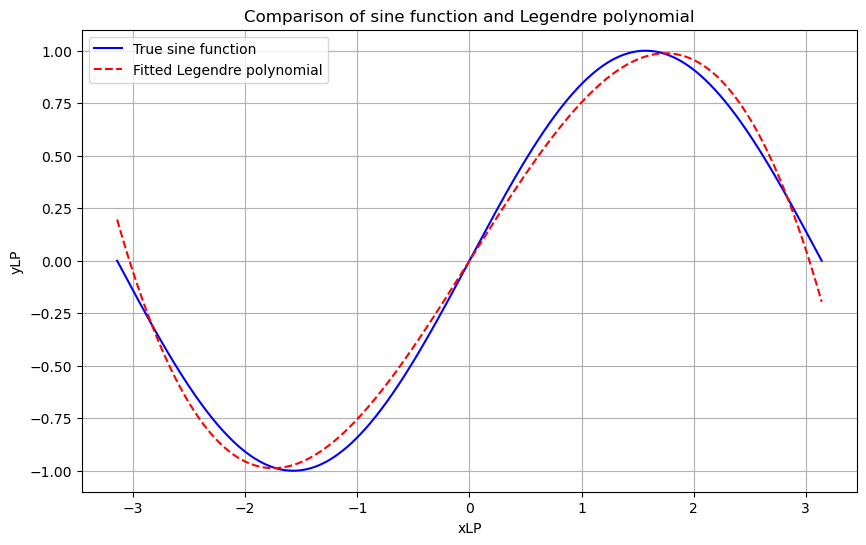

Maximum absolute error: 0.19596587121486664


In [13]:
import matplotlib.pyplot as plt

# Compute the final predicted y values
with torch.no_grad():
    y_predLP = aLP + bLP * P3(cLP + dLP * x)

# Convert tensors to numpy arrays for plotting
x_npLP = xLP.cpu().numpy() # ground truth
y_npLP = yLP.cpu().numpy() # ground truth
y_pred_npLP = y_predLP.cpu().numpy() #calculates

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_npLP, y_npLP, 'b-', label='True sine function') #ground truth
plt.plot(x_npLP, y_pred_npLP, 'r--', label='Fitted Legendre polynomial')
plt.xlabel('xLP')
plt.ylabel('yLP')
plt.title('Comparison of sine function and Legendre polynomial')
plt.legend()
plt.grid(True)
plt.show()

# Print the maximum absolute error
max_errorLP = torch.max(torch.abs(y_predLP - yLP)).item()
print(f'Maximum absolute error: {max_errorLP}')

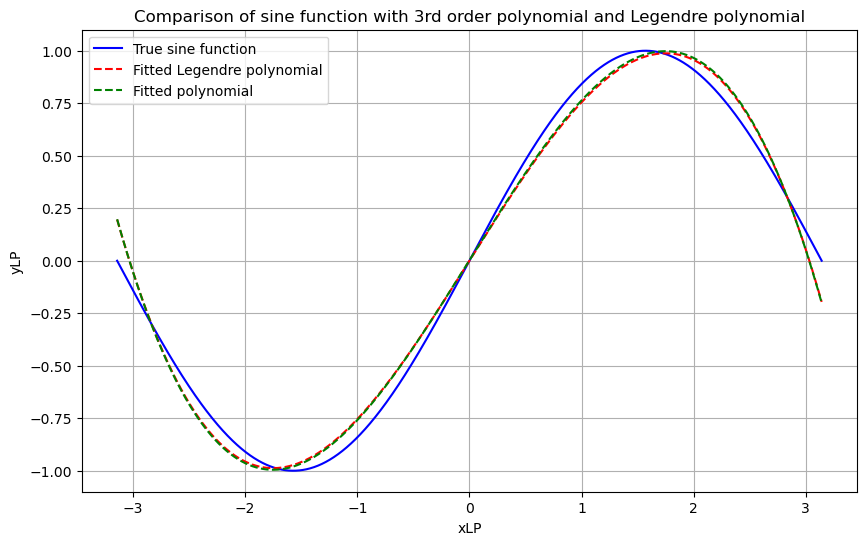

Maximum absolute error: for LP is 0.19596587121486664 and for 3rd order polynomial is 0.20095816254615784


In [14]:
import matplotlib.pyplot as plt

# Compute the final predicted y values
with torch.no_grad():
    y_predLP = aLP + bLP * P3(cLP + dLP * x)

with torch.no_grad():
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

# Convert tensors to numpy arrays for plotting
x_npLP = xLP.cpu().numpy() # ground truth
y_npLP = yLP.cpu().numpy() # ground truth
y_pred_npLP = y_predLP.cpu().numpy() #calculates

x_np = x.cpu().numpy()
y_np = y.cpu().numpy()
y_pred_np = y_pred.cpu().numpy()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_npLP, y_npLP, 'b-', label='True sine function') #ground truth
plt.plot(x_npLP, y_pred_npLP, 'r--', label='Fitted Legendre polynomial')
plt.plot(x_np, y_pred_np, 'g--', label='Fitted polynomial')

plt.xlabel('xLP')
plt.ylabel('yLP')
plt.title('Comparison of sine function with 3rd order polynomial and Legendre polynomial')
plt.legend()
plt.grid(True)
plt.show()

# Print the maximum absolute error
print(f'Maximum absolute error: for LP is {max_errorLP} and for 3rd order polynomial is {max_error}')

In this warm-up exercise, we explore the use of numpy to manually implement a simple machine learning model: a third-order polynomial trained to approximate the function \( y = \sin(x) \) over the interval \(-\pi\) to \(\pi\). This implementation focuses on minimizing the squared Euclidean distance between the predicted and actual values, a common approach in regression tasks. By leveraging numpy, a powerful library for numerical computations, we manually compute the forward pass, loss, and backward pass. Unlike specialized deep learning frameworks, numpy arrays are generic n-dimensional arrays that facilitate efficient numerical operations but lack built-in support for automatic differentiation or computational graphs. This exercise provides foundational insights into the mechanics of gradient descent and model training, laying the groundwork for more advanced implementations in deep learning frameworks.

Now we will use Numpy to initializing and preparing data for a polynomial model.For data initialization use numpy to create x and y arrays. x is a linearly spaced array from -pi to pi. and y is computed as the sine of x.
Weight Initialization: Randomly initializes weights a, b, c, and d using numpy.random.randn(), which generates samples from the standard normal distribution.

In [15]:
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn() 
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

In [16]:
learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 698.0971277029212
199 480.2252283135183
299 331.5905991364746
399 230.0741114059082
499 160.6593094816529
599 113.14034929820113
699 80.57315341172286
799 58.22763040158868
899 42.87812445973863
999 32.32240347963762
1099 25.055224257902886
1199 20.046557483725884
1299 16.590749701852495
1399 14.20381707784875
1499 12.553433001468731
1599 11.411147802670136
1699 10.619743464927225
1799 10.070903486413675
1899 9.689920975148642
1999 9.425214579618803
Result: y = 0.022991755115013408 + 0.8680870001406016 x + -0.0039664603417963245 x^2 + -0.09494428108014857 x^3


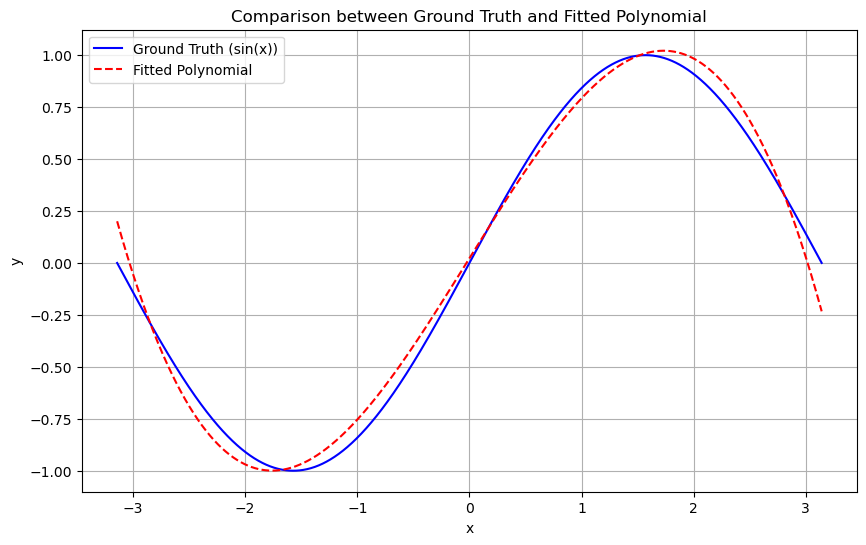

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Ground Truth (sin(x))', color='blue')
plt.plot(x, y_pred, label='Fitted Polynomial', color='red', linestyle='--')
plt.title('Comparison between Ground Truth and Fitted Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In this exercise, we delve into implementing a third-order polynomial model using PyTorch to approximate the function \( y = \sin(x) \) over the interval \(-\pi\) to \(\pi\). The goal is to minimize the squared Euclidean distance between the predicted polynomial values and the actual sine values. This implementation involves manually computing the forward pass, loss, and backward pass using PyTorch tensors.
PyTorch tensors are analogous to numpy arrays in that they serve as generic n-dimensional arrays for numerical computations. However, a key advantage of PyTorch tensors is their ability to operate on both CPU and GPU, facilitating accelerated computations. To leverage GPU capabilities, one can simply cast the tensor to a CUDA datatype. This tutorial provides a foundational understanding of how PyTorch can be used for numerical tasks, emphasizing the flexibility and power of its tensor operations, even without utilizing its advanced deep learning features.

In [26]:
import torch
import math


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

In [27]:
learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = torch.pow(y_pred - y, 2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 815.4585571289062
199 542.354248046875
299 361.7222900390625
399 242.24888610839844
499 163.22567749023438
599 110.95654296875
699 76.38285064697266
799 53.51338195800781
899 38.3856201171875
999 28.378429412841797
1099 21.758548736572266
1199 17.379283905029297
1299 14.482165336608887
1399 12.565428733825684
1499 11.297333717346191
1599 10.458293914794922
1699 9.903180122375488
1799 9.53588581085205
1899 9.29281997680664
1999 9.131973266601562
Result: y = 0.0022224520798772573 + 0.8396145105361938 x + -0.00038341069011949003 x^2 + -0.09089431166648865 x^3


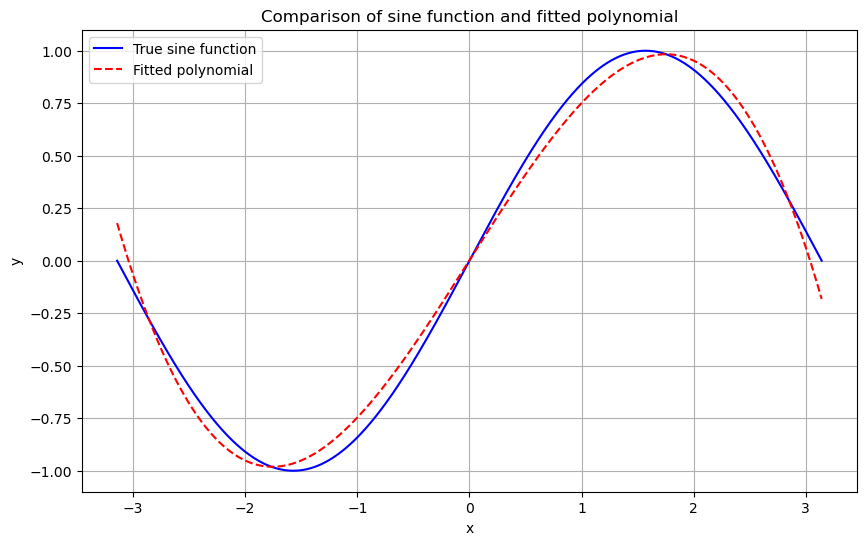

Maximum absolute error: 0.18212905526161194


In [28]:
import matplotlib.pyplot as plt

# Compute the final predicted y values
with torch.no_grad():
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

# Convert tensors to numpy arrays for plotting
x_np = x.cpu().numpy()
y_np = y.cpu().numpy()
y_pred_np = y_pred.cpu().numpy()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_np, y_np, 'b-', label='True sine function')
plt.plot(x_np, y_pred_np, 'r--', label='Fitted polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of sine function and fitted polynomial')
plt.legend()
plt.grid(True)
plt.show()

# Print the maximum absolute error
max_error = torch.max(torch.abs(y_pred - y)).item()
print(f'Maximum absolute error: {max_error}')

### Polynomial Approximation using Pytorch Tensors and Autograd

This implementation demonstrates fundamental concepts in computational mathematics and automatic differentiation using PyTorch. We explore the approximation of a sinusoidal function using a third-order polynomial over the domain [-π, π]. The problem serves as a canonical example of gradient-based optimization in machine learning.


In [28]:
import torch
import math

dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

By default, requires_grad=False, which indicates that we do not need to
Compute gradients with respect to these Tensors during the backward pass.

In [29]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000, dtype=dtype)
y = torch.sin(x)

# Creating Trainable Parameters
a = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)
c = torch.randn((), dtype=dtype, requires_grad=True)
d = torch.randn((), dtype=dtype, requires_grad=True)

### Implements polynomial regression:
 * Fits cubic function to sine wave data
 * Iteratively minimizes prediction error
 * Monitors convergence through loss values
 * Classic example of gradient-based optimization
	
### Gradient Computation ( loss.backward)
 * Activates PyTorch's automatic differentiation
 * Computes partial derivatives of loss with respect to parameters (a, b, c, d)
 * Stores gradients in .grad attributes of each parameter

### Parameter Updates
* Implements gradient descent algorithm
* torch.no.grad() prevents gradient tracking during updates
* Each parameter update follows the formula:
  * parameter = parameter - (learning_rate * gradient)
* Learning rate (1e-6) ensures stable convergence.

### Gradeint Reset
* Clears accumulated gradients
* Prepares parameters for next optimization iteration
* Prevents gradient accumulatiom between steps.

### Result Display
This code implements a simple gradient descent algorithm to fit a cubic polynomial to data. The forward pass computes predictions, the loss function measures prediction error, and the backward pass updates parameters to minimize this error iteratively.

In [30]:
learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())
    loss.backward() # Gradient Computation
    with torch.no_grad(): # Parametrs Update
     a -= learning_rate * a.grad
     b -= learning_rate * b.grad
     c -= learning_rate * c.grad
     d -= learning_rate * d.grad

     # Gradient Reset
     a.grad = None
     b.grad = None
     c.grad = None
     d.grad = None
# Result Display     
print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')


99 4931.12890625
199 3278.866455078125
299 2181.876220703125
399 1453.3514404296875
499 969.3930053710938
599 647.8032836914062
699 434.0395812988281
799 291.901123046875
899 197.3549041748047
999 134.44210815429688
1099 92.56198120117188
1199 64.67134094238281
1299 46.08889389038086
1399 33.70232009887695
1499 25.441761016845703
1599 19.93001937866211
1699 16.25029754638672
1799 13.792299270629883
1899 12.149454116821289
1999 11.050697326660156
Result: y = -0.02265883795917034 + 0.815782904624939 x + 0.003909027669578791 x^2 + -0.08750446885824203 x^3


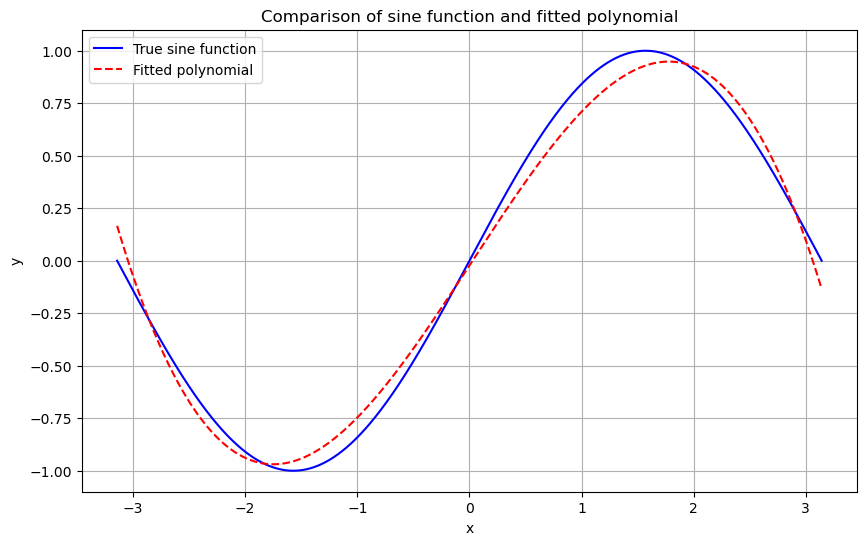

Maximum absolute error: 0.1662520468235016


In [31]:
import matplotlib.pyplot as plt

# Compute the final predicted y values
with torch.no_grad():
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

# Convert tensors to numpy arrays for plotting
x_np = x.cpu().numpy()
y_np = y.cpu().numpy()
y_pred_np = y_pred.cpu().numpy()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_np, y_np, 'b-', label='True sine function')
plt.plot(x_np, y_pred_np, 'r--', label='Fitted polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of sine function and fitted polynomial')
plt.legend()
plt.grid(True)
plt.show()

# Print the maximum absolute error
max_error = torch.max(torch.abs(y_pred - y)).item()
print(f'Maximum absolute error: {max_error}')
